In [90]:
import os
import numpy as np
import pandas as pd
import seaborn as sea
import random
import tensorflow as tf
from keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn import svm
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
from IPython.display import display
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn import svm
from IPython.display import clear_output
import xgboost as xgb
import pickle
from keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from keras.models import Model


In [91]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [101]:
# load pretrained MobileNet
pre_trained_model = MobileNet(input_shape=(224, 224, 3))
pre_trained_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [3]:
vector = pre_trained_model.get_layer("reshape_2").output
feature_extractor = tf.keras.Model(pre_trained_model.input, vector)

NameError: name 'pre_trained_model' is not defined

In [153]:
labels = ['bellflower','daisy','dandelion','tulip','sunflower','rose','lotus','iris']
path = "D:/school/ML/Machine_Learning_Project/Data/train"

# create empty feature and label lists
x_list_train = []
y_list_train = []

for f in range(8):
    folder_path = os.path.join(path, labels[f])
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # load image
        img = Image.open(file_path).convert("RGB")
        img = img.resize((224, 224))
        # convert image to numpy array
        img_arr = np.array(img)
        # add 1 more dimension
        img_arr_b = np.expand_dims(img_arr, axis=0)
        # preprocess image
        input_img = preprocess_input(img_arr_b)
        # extract feature
        feature_vec = feature_extractor.predict(input_img)
        x_list_train.append(feature_vec.ravel())
        y_list_train.append(f)
        clear_output(wait=True)

KeyboardInterrupt: 

In [ ]:
x_train_temp = np.asarray(x_list_train, dtype=np.float32)
y_train_temp = np.asarray(y_list_train, dtype=np.float32)
with open('x_train_color.pkl', 'wb') as file:
    pickle.dump(x_train_temp, file)
with open('y_train_color.pkl', 'wb') as file:
    pickle.dump(y_train_temp, file)

NameError: name 'x_list_train' is not defined

In [ ]:

path = "D:/school/ML/Machine_Learning_Project/Data/test"

# create empty feature and label lists
x_list = []
y_list = []

for f in range(8):
    folder_path = os.path.join(path, labels[f])
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # load image
        img = Image.open(file_path).convert("RGB")
        img = img.resize((224, 224))
        # convert image to numpy array
        img_arr = np.array(img)
        # add 1 more dimension
        img_arr_b = np.expand_dims(img_arr, axis=0)
        # preprocess image
        input_img = preprocess_input(img_arr_b)
        # extract feature
        feature_vec = feature_extractor.predict(input_img)
        x_list.append(feature_vec.ravel())
        y_list.append(f)
        clear_output(wait=True)

1/1 [==============================] - 1s 747ms/step


In [154]:
x_test = np.asarray(x_list, dtype=np.float32)
y_test = np.asarray(y_list, dtype=np.float32)
with open('x_test_color.pkl', 'wb') as file:
    pickle.dump(x_test, file)
with open('y_test_color.pkl', 'wb') as file:
    pickle.dump(y_test, file)


NameError: name 'x_list' is not defined

In [4]:
with open('x_train_color.pkl', 'rb') as file:
    x_train_temp = pickle.load(file)
with open('y_train_color.pkl', 'rb') as file:
    y_train_temp = pickle.load(file)
    

In [5]:
with open('x_test_color.pkl', 'rb') as file:
    x_test = pickle.load(file)
with open('y_test_color.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [6]:
with open('x_test_nocolor.pkl', 'rb') as file:
    x_test_nocolor = pickle.load(file)
with open('y_test_nocolor.pkl', 'rb') as file:
    y_test_nocolor = pickle.load(file)

In [7]:

x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.125, stratify=y_train_temp, random_state=40)

print("Shape of train_X")
print(x_train.shape)
print("\nShape of test_X")
print(x_test.shape)

Shape of train_X
(14119, 1000)

Shape of test_X
(4000, 1000)


## CONFUSION MATRIX

In [62]:
class ConfusionMatrixPlot:
    def __init__(self, labels, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.labels = labels
    
    def plot(self, ax):
        conf_matrix = confusion_matrix(y_true=self.y_true, y_pred=self.y_pred)
        ax.imshow(conf_matrix, cmap='Blues')
        ax.set_xticks(np.arange(len(self.labels)))
        ax.set_yticks(np.arange(len(self.labels)))
        ax.set_xticklabels(self.labels)
        ax.set_yticklabels(self.labels)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title('Confusion Matrix')

## CLASSIFICATION REPORT

In [88]:
class ClassificationReportPlot:
    def __init__(self,labels, true_labels, predicted_labels):
        self.true_labels = true_labels
        self.predicted_labels = predicted_labels
        self.labels = labels
    def plot(self):
        report = classification_report(self.true_labels, self.predicted_labels, target_names=labels, output_dict=True)
        report_df = pd.DataFrame(report).transpose()
        pd.set_option("display.max_rows", None)
        report_df.style.set_properties(**{'border-color': 'black', 'border-style': 'solid'})
        display(report_df)
        plt.show()


## K NEAREST NEIGHBOR

Best Model: KNeighborsClassifier(weights=<function weight2 at 0x000001C4AA11CFE0>)


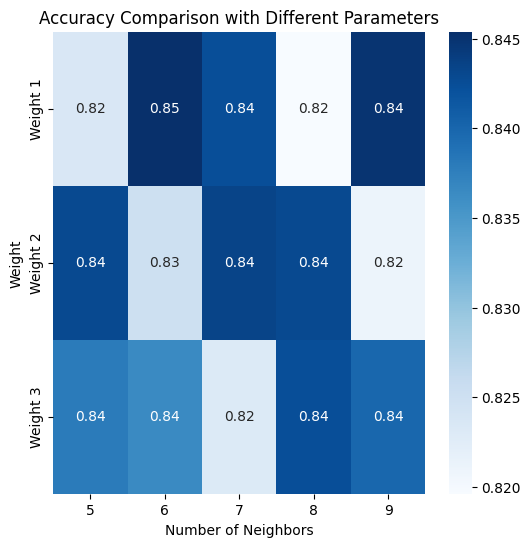

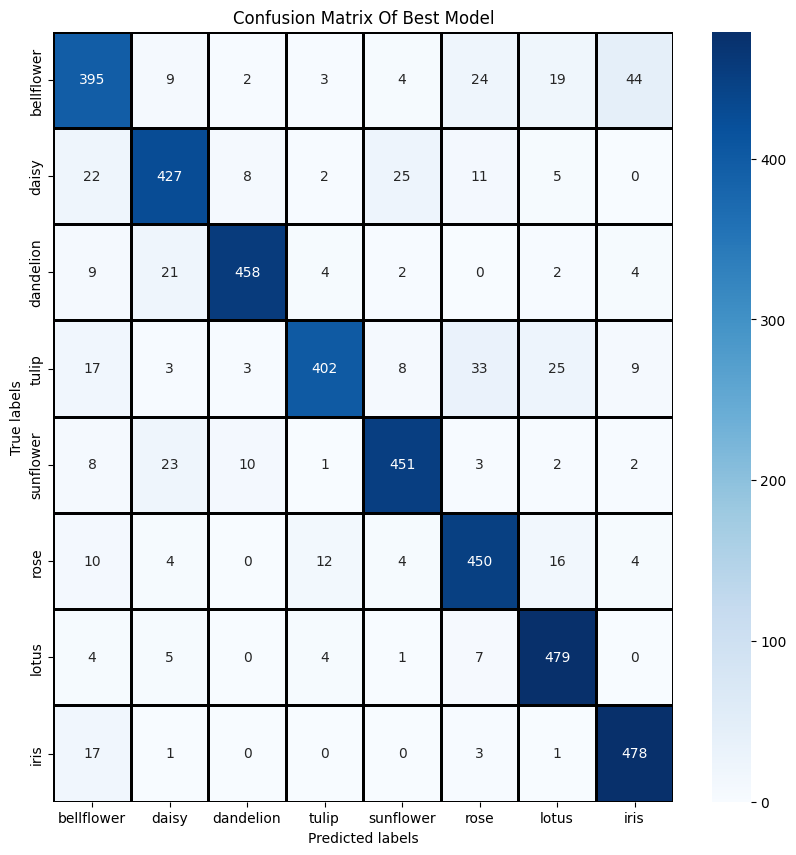

,precision,recall,f1-score,support
bellflower,0.819502,0.790,0.804481,500.000
daisy,0.866126,0.854,0.860020,500.000
dandelion,0.952183,0.916,0.933741,500.000
tulip,0.939252,0.804,0.866379,500.000
sunflower,0.911111,0.902,0.906533,500.000
rose,0.847458,0.900,0.872939,500.000
lotus,0.872495,0.958,0.913251,500.000
iris,0.883549,0.956,0.918348,500.000
accuracy,0.885000,0.885,0.885000,0.885
macro avg,0.886460,0.885,0.884461,4000.000


In [10]:
from sklearn.model_selection import GridSearchCV
import math
def weight1(distances):
    return distances
def weight2(distances):
    return 1 / distances**2
def weight3(distances):
    return 1 / distances
param_grid = {
    'n_neighbors': [5,6,7,8, 9],
    'weights': [weight1, weight2, weight3]
}
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_val, y_val)
best_model_knn = grid_search.best_estimator_
print("Best Model:", best_model_knn)
best_model_knn.fit(x_train_temp,y_train_temp)
y_pred_knn = best_model_knn.predict(x_test)
mean_test_scores = grid_search.cv_results_['mean_test_score']
parameters = grid_search.cv_results_['params']
data = pd.DataFrame(mean_test_scores.reshape(len(param_grid['weights']), len(param_grid['n_neighbors'])),
                    index=[f'Weight {i+1}' for i in range(len(param_grid['weights']))],
                    columns=[f'{j}' for j in param_grid['n_neighbors']])
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel('Number of Neighbors')
plt.ylabel('Weight')
plt.title('Accuracy Comparison with Different Parameters')
plt.show()
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_knn)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test, y_pred_knn)
report_plot.plot()

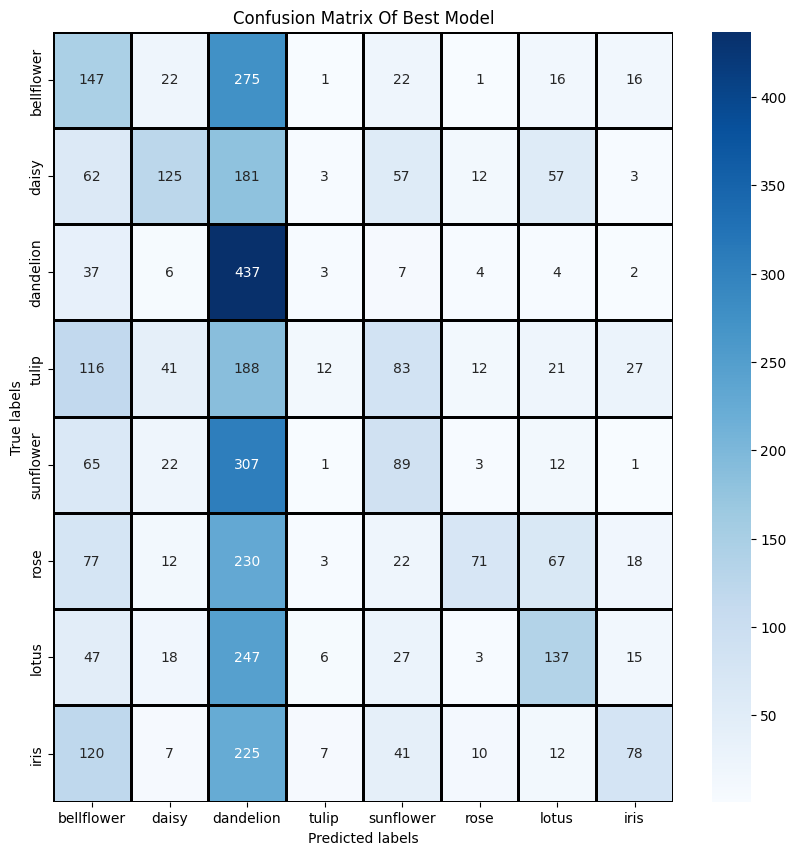

,precision,recall,f1-score,support
bellflower,0.219076,0.294,0.251067,500.000
daisy,0.494071,0.250,0.332005,500.000
dandelion,0.209091,0.874,0.337452,500.000
tulip,0.333333,0.024,0.044776,500.000
sunflower,0.255747,0.178,0.209906,500.000
rose,0.612069,0.142,0.230519,500.000
lotus,0.420245,0.274,0.331719,500.000
iris,0.487500,0.156,0.236364,500.000
accuracy,0.274000,0.274,0.274000,0.274
macro avg,0.378892,0.274,0.246726,4000.000


In [11]:
y_pred_knn_nocolor=best_model_knn.predict(x_test_nocolor)
report_plot = ConfusionMatrixPlot(labels, y_test_nocolor, y_pred_knn_nocolor)
report_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test_nocolor, y_pred_knn_nocolor)
report_plot.plot()

In [24]:
i=0
prop_class=[]
mis_class=[]

for i in range(4000):
    if(y_test[i] == y_pred_knn[i]):
        prop_class.append(i)
    else:
        mis_class.append(i)
    
y_knn=y_pred_knn.tolist()


458
449
99
68
130
180
183
211
294
160
335
87
27
377
258
244


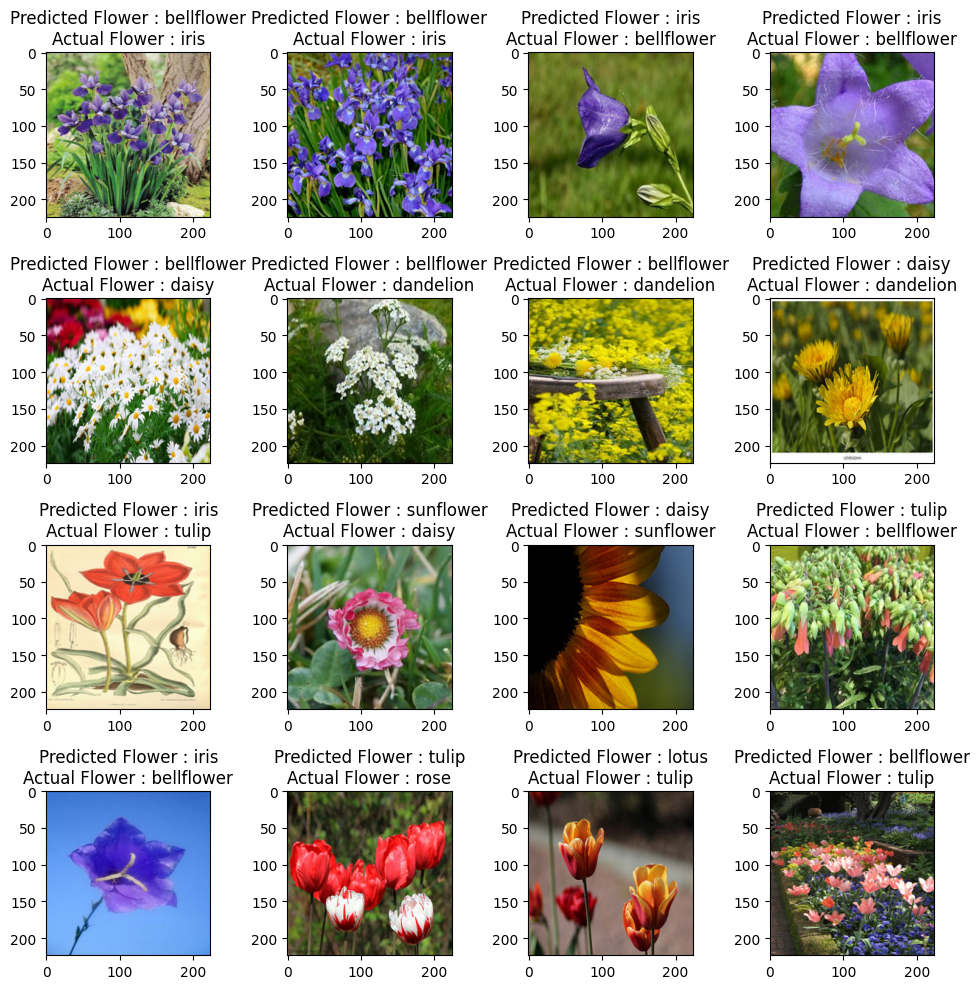

In [60]:
import random
path = "D:/school/ML/Machine_Learning_Project/Data/test"

# create empty feature and label lists
image_file=dict()
for f in range(8):
    folder_path = os.path.join(path, labels[f])
    image_file[f]=list()
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        image_file[f].append(file_path)
count=0
fig,ax=plt.subplots(4,4)
fig.set_size_inches(10,10)
for i in range (4):
    for j in range (4):
        index=random.randrange(len(mis_class))
        index=mis_class[index]
        a=index//500
        b=index%500
        img = Image.open(image_file[a][b]).convert("RGB")
        img = img.resize((224, 224))
        ax[i,j].imshow(img)
        ax[i,j].set_title("Predicted Flower : "+labels[int(y_knn[index])]+"\n"+"Actual Flower : "+labels[int(y_test[index])])
        plt.tight_layout()
        count+=1

## SVM

In [17]:
from sklearn import svm

param_grid = {'C': [1,2,5], 'gamma': [0.002, 0.0005, 0.001]}

svm = svm.SVC(kernel='rbf')
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_val, y_val)
best_model_svm = grid_search.best_estimator_
print("Best Model:", best_model_svm)
best_model_svm.fit(x_train_temp,y_train_temp)
y_pred_svm = best_model_svm.predict(x_test)
mean_test_scores = grid_search.cv_results_['mean_test_score']
parameters = grid_search.cv_results_['params']


Best Model: SVC(C=2, gamma=0.0005)


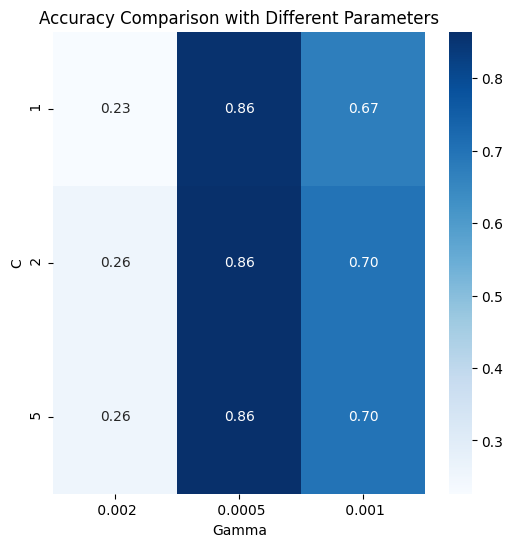

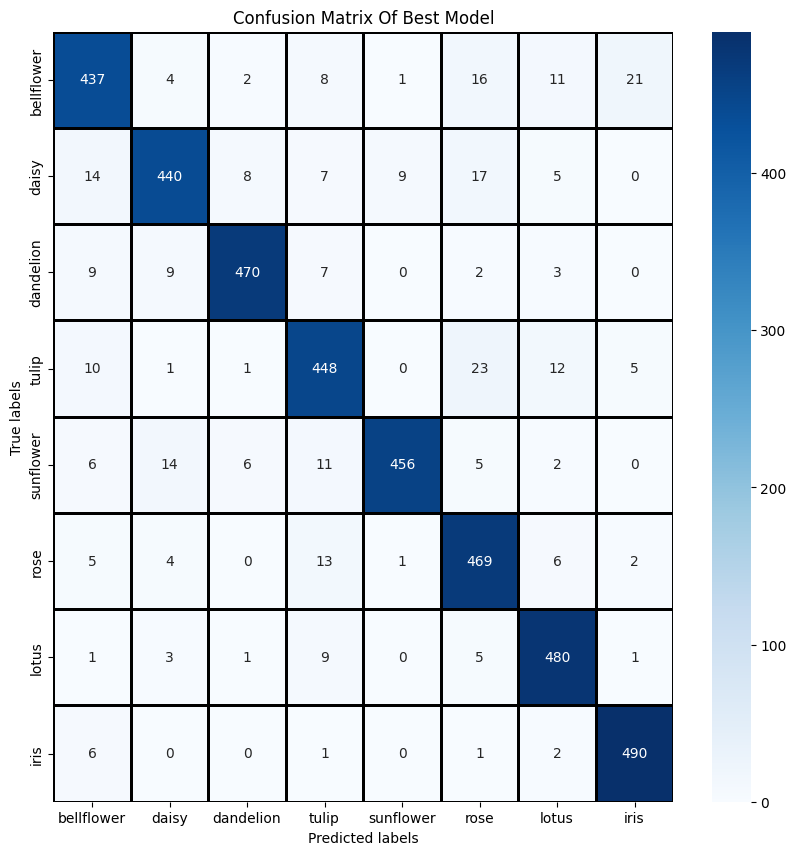

,precision,recall,f1-score,support
bellflower,0.895492,0.8740,0.884615,500.0000
daisy,0.926316,0.8800,0.902564,500.0000
dandelion,0.963115,0.9400,0.951417,500.0000
tulip,0.888889,0.8960,0.892430,500.0000
sunflower,0.976445,0.9120,0.943123,500.0000
rose,0.871747,0.9380,0.903661,500.0000
lotus,0.921305,0.9600,0.940255,500.0000
iris,0.944123,0.9800,0.961727,500.0000
accuracy,0.922500,0.9225,0.922500,0.9225
macro avg,0.923429,0.9225,0.922474,4000.0000


In [18]:
data = pd.DataFrame(
    np.array(mean_test_scores).reshape(len(param_grid['C']), len(param_grid['gamma'])),
    index=[f' {i}' for i in param_grid['C']],
    columns=[f' {j}' for j in param_grid['gamma']])
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Comparison with Different Parameters')
plt.show()
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_svm)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test, y_pred_svm)
report_plot.plot()

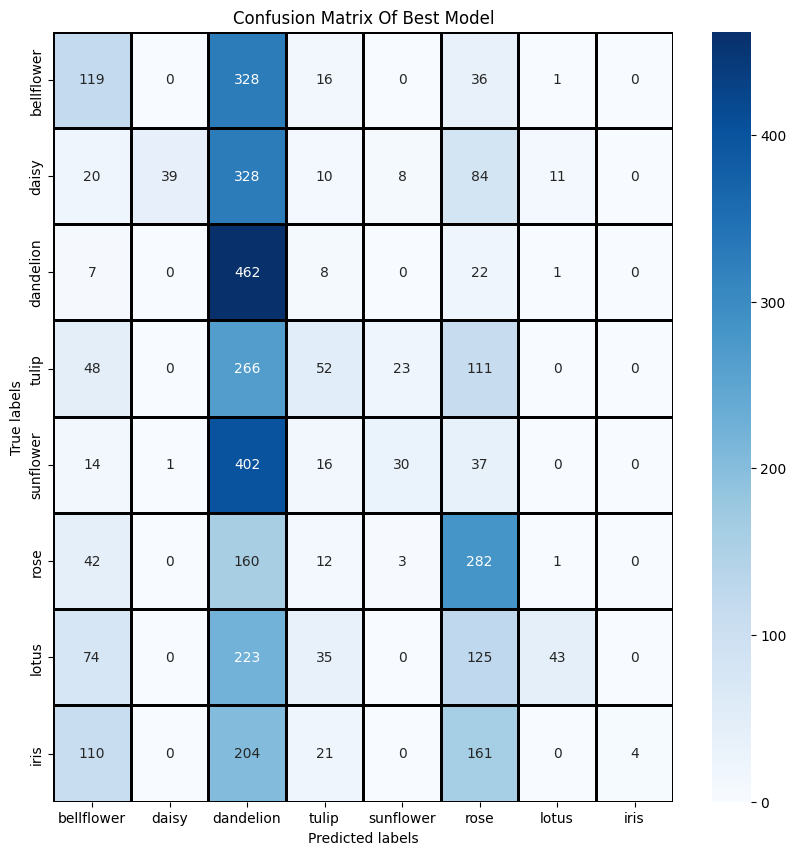

,precision,recall,f1-score,support
bellflower,0.274194,0.23800,0.254818,500.00000
daisy,0.975000,0.07800,0.144444,500.00000
dandelion,0.194690,0.92400,0.321615,500.00000
tulip,0.305882,0.10400,0.155224,500.00000
sunflower,0.468750,0.06000,0.106383,500.00000
rose,0.328671,0.56400,0.415317,500.00000
lotus,0.754386,0.08600,0.154399,500.00000
iris,1.000000,0.00800,0.015873,500.00000
accuracy,0.257750,0.25775,0.257750,0.25775
macro avg,0.537697,0.25775,0.196009,4000.00000


In [19]:

y_pred_svm_nocolor=best_model_svm.predict(x_test_nocolor)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_svm_nocolor)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test_nocolor, y_pred_svm_nocolor)
report_plot.plot()

## XGBOOST


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


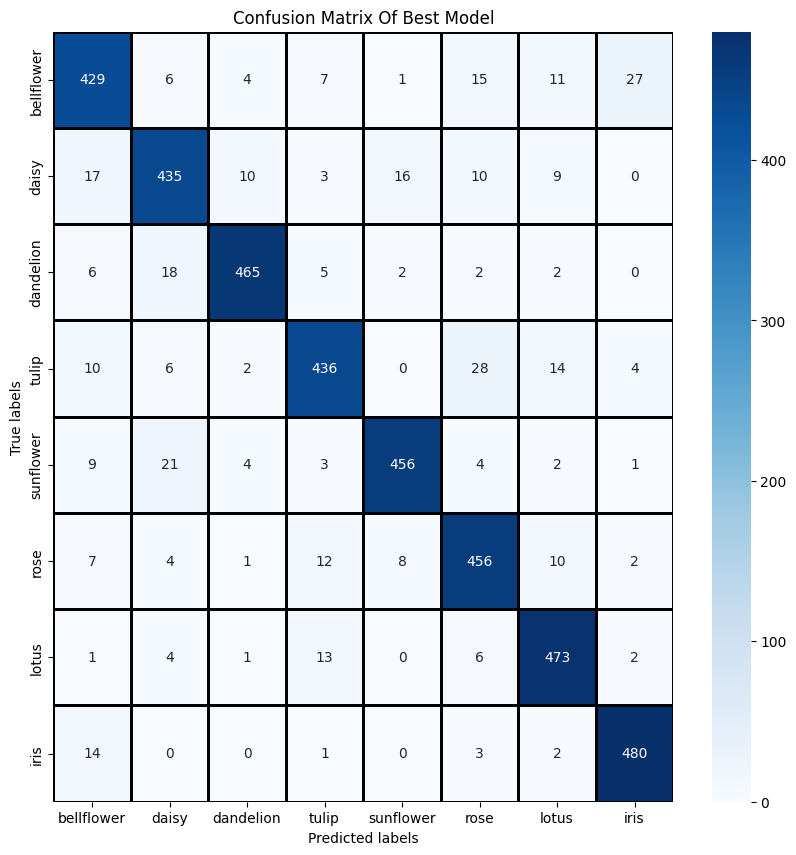

,precision,recall,f1-score,support
bellflower,0.870183,0.8580,0.864048,500.0000
daisy,0.880567,0.8700,0.875252,500.0000
dandelion,0.954825,0.9300,0.942249,500.0000
tulip,0.908333,0.8720,0.889796,500.0000
sunflower,0.944099,0.9120,0.927772,500.0000
rose,0.870229,0.9120,0.890625,500.0000
lotus,0.904398,0.9460,0.924731,500.0000
iris,0.930233,0.9600,0.944882,500.0000
accuracy,0.907500,0.9075,0.907500,0.9075
macro avg,0.907858,0.9075,0.907419,4000.0000


In [ ]:
param_grid = {
    'max_depth': [5,10,30,50,100],
    'n_estimators': [10,20,50,100,200]
}
XGBoost = XGBClassifier(random_state=50, n_jobs=-1)
grid_search = GridSearchCV(estimator=XGBoost, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_val, y_val)
best_model_xgb = grid_search.best_estimator_
print("Best Model:", best_model_xgb)
best_model_xgb.fit(x_train_temp,y_train_temp)
y_pred_xgb = best_model_xgb.predict(x_test)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_xgb)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test, y_pred_xgb)
report_plot.plot()


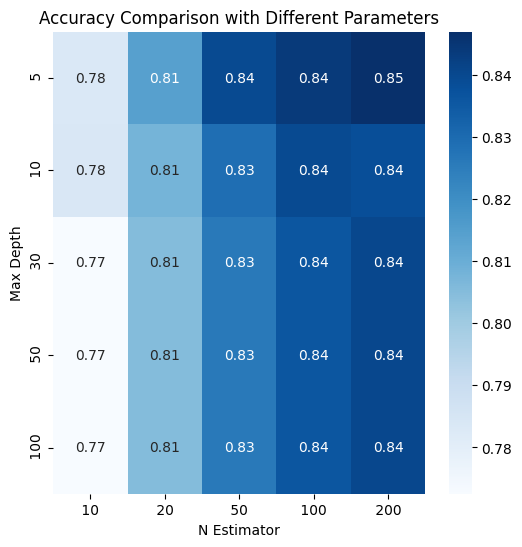

In [ ]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
parameters = grid_search.cv_results_['params']
data = pd.DataFrame(mean_test_scores.reshape(len(param_grid['max_depth']), len(param_grid['n_estimators'])),
                    index=[f' {i}' for i in param_grid['max_depth']],
                    columns=[f' {j} ' for j in param_grid['n_estimators']])
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel('N Estimator')
plt.ylabel('Max Depth')
plt.title('Accuracy Comparison with Different Parameters')
plt.show()

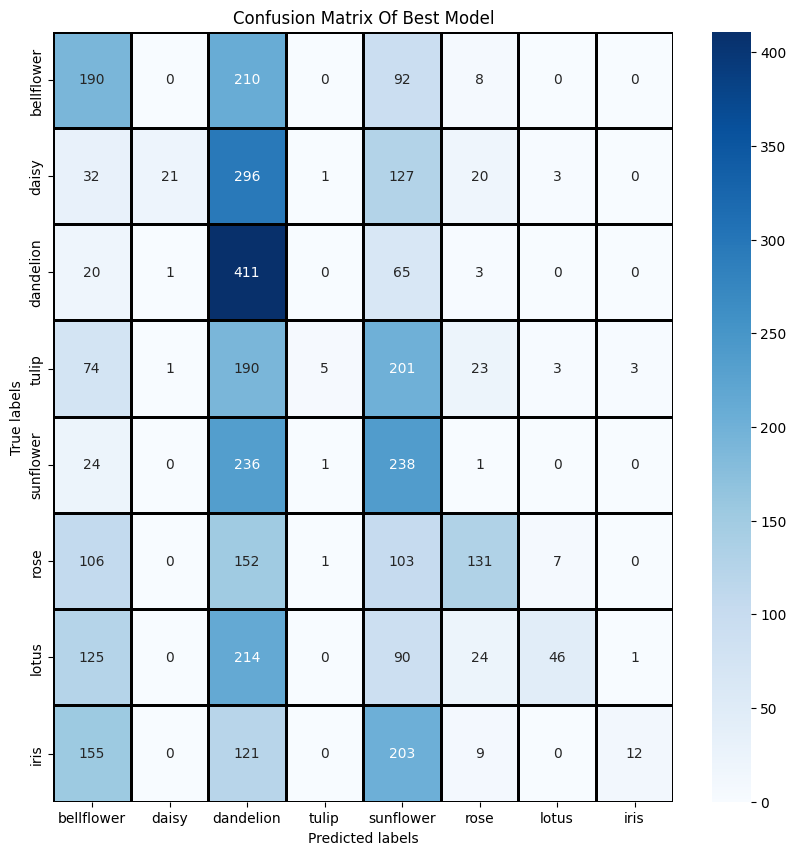

,precision,recall,f1-score,support
bellflower,0.261708,0.3800,0.309951,500.0000
daisy,0.913043,0.0420,0.080306,500.0000
dandelion,0.224590,0.8220,0.352790,500.0000
tulip,0.625000,0.0100,0.019685,500.0000
sunflower,0.212690,0.4760,0.294009,500.0000
rose,0.598174,0.2620,0.364395,500.0000
lotus,0.779661,0.0920,0.164580,500.0000
iris,0.750000,0.0240,0.046512,500.0000
accuracy,0.263500,0.2635,0.263500,0.2635
macro avg,0.545608,0.2635,0.204028,4000.0000


In [ ]:

y_pred_xgb_nocolor=best_model_xgb.predict(x_test_nocolor)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_xgb_nocolor)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test_nocolor, y_pred_xgb_nocolor)
report_plot.plot()

Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


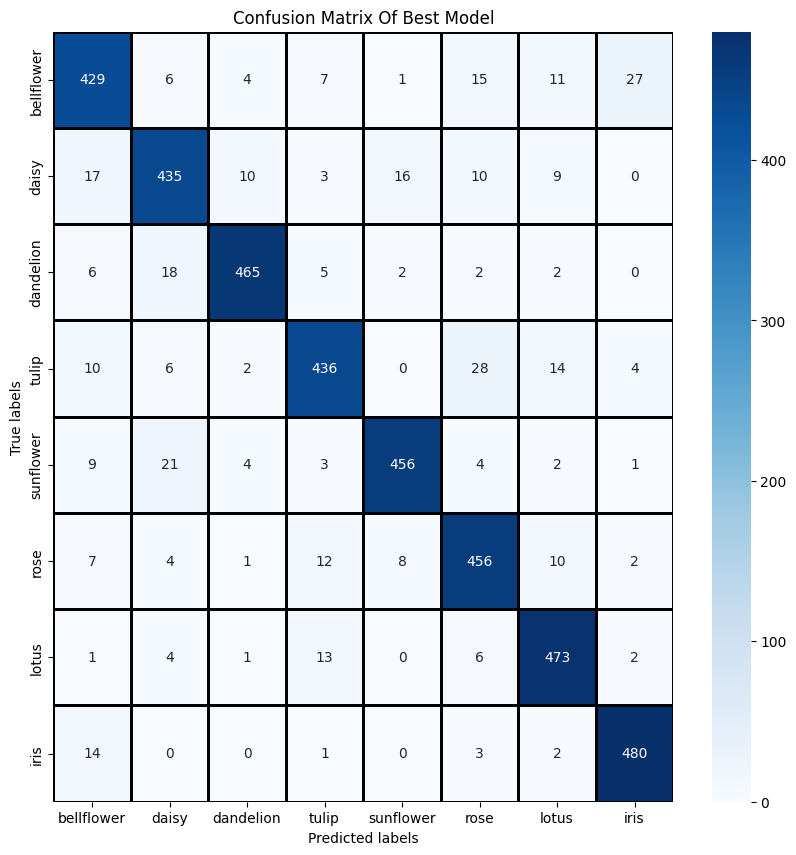

,precision,recall,f1-score,support
bellflower,0.870183,0.8580,0.864048,500.0000
daisy,0.880567,0.8700,0.875252,500.0000
dandelion,0.954825,0.9300,0.942249,500.0000
tulip,0.908333,0.8720,0.889796,500.0000
sunflower,0.944099,0.9120,0.927772,500.0000
rose,0.870229,0.9120,0.890625,500.0000
lotus,0.904398,0.9460,0.924731,500.0000
iris,0.930233,0.9600,0.944882,500.0000
accuracy,0.907500,0.9075,0.907500,0.9075
macro avg,0.907858,0.9075,0.907419,4000.0000


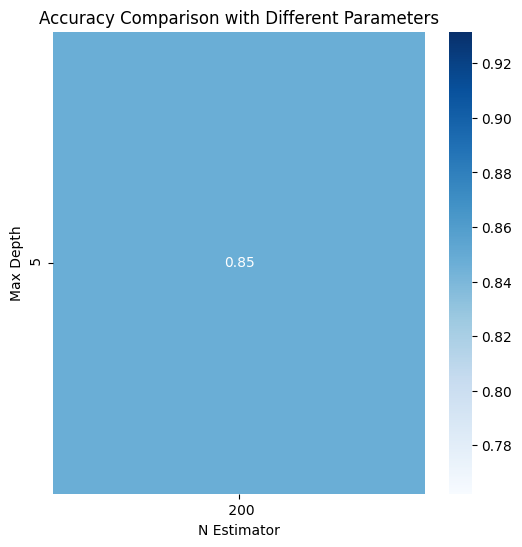

In [21]:
param_grid = {
    'max_depth': [5],
    'n_estimators': [200]
}
XGBoost = XGBClassifier(random_state=50, n_jobs=-1)
grid_search = GridSearchCV(estimator=XGBoost, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_val, y_val)
best_model_xgb = grid_search.best_estimator_
print("Best Model:", best_model_xgb)
best_model_xgb.fit(x_train_temp,y_train_temp)
y_pred_xgb = best_model_xgb.predict(x_test)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_xgb)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test, y_pred_xgb)
report_plot.plot()
mean_test_scores = grid_search.cv_results_['mean_test_score']
parameters = grid_search.cv_results_['params']
data = pd.DataFrame(mean_test_scores.reshape(len(param_grid['max_depth']), len(param_grid['n_estimators'])),
                    index=[f' {i}' for i in param_grid['max_depth']],
                    columns=[f' {j}' for j in param_grid['n_estimators']])
plt.figure(figsize=(6, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel('N Estimator')
plt.ylabel('Max Depth')
plt.title('Accuracy Comparison with Different Parameters')
plt.show()

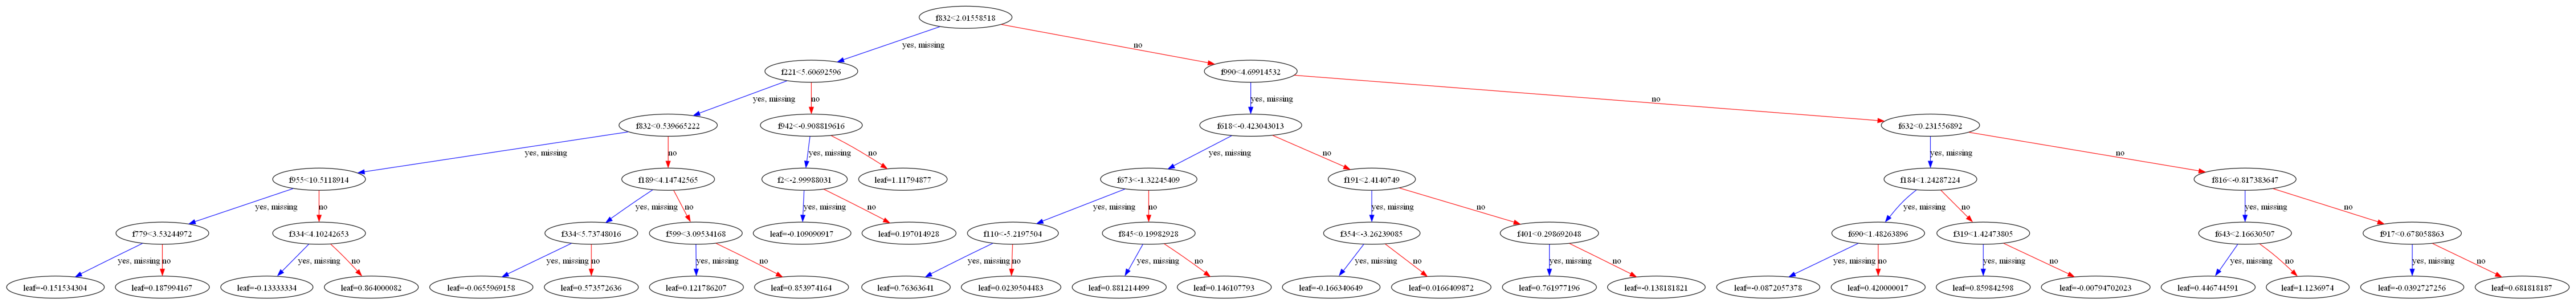

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))
xgb.plot_tree(best_model_xgb, num_trees=4, ax=ax)
plt.show()

## RIDGE CLASSIFICATION

d:\App\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.46334e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\App\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.21657e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\App\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.17336e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\App\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.22132e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\App\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.18407e-08): result may not be accurate.


Best Model: RidgeClassifier(alpha=10.0, solver='saga')


d:\App\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\App\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\App\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\App\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


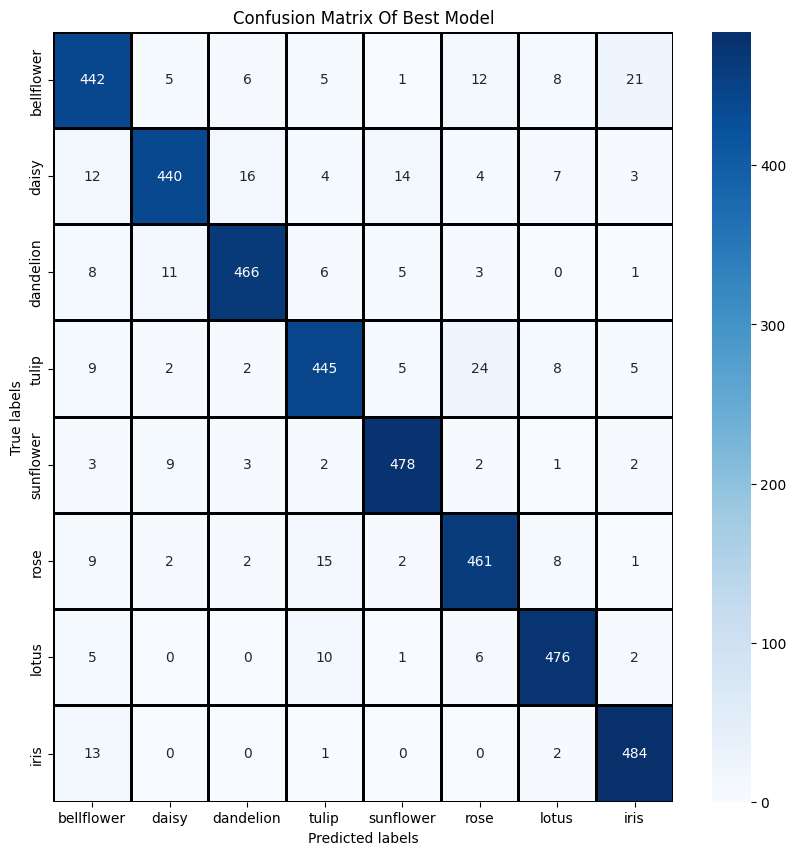

,precision,recall,f1-score,support
bellflower,0.882236,0.884,0.883117,500.000
daisy,0.938166,0.880,0.908153,500.000
dandelion,0.941414,0.932,0.936683,500.000
tulip,0.911885,0.890,0.900810,500.000
sunflower,0.944664,0.956,0.950298,500.000
rose,0.900391,0.922,0.911067,500.000
lotus,0.933333,0.952,0.942574,500.000
iris,0.932563,0.968,0.949951,500.000
accuracy,0.923000,0.923,0.923000,0.923
macro avg,0.923081,0.923,0.922832,4000.000


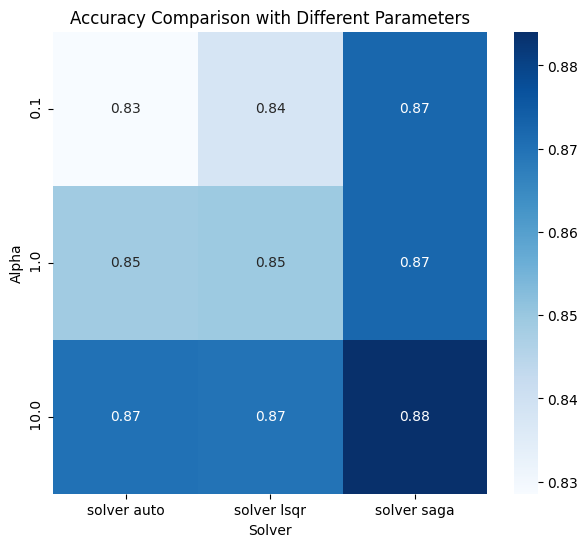

In [22]:
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'lsqr', 'saga']
}
ridge_classifier = RidgeClassifier()
grid_search = GridSearchCV(estimator=ridge_classifier, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_val, y_val)
best_model = grid_search.best_estimator_
print("Best Model:", best_model)
best_model.fit(x_train_temp,y_train_temp)
y_pred_ridge = best_model.predict(x_test)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_ridge)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test, y_pred_ridge)
report_plot.plot()
mean_test_scores = grid_search.cv_results_['mean_test_score']
parameters = grid_search.cv_results_['params']
data = pd.DataFrame(
    np.array(mean_test_scores).reshape(len(param_grid['alpha']), len(param_grid['solver'])),
    index=[f' {i}' for i in param_grid['alpha']],
    columns=[f'solver {j}' for j in param_grid['solver']])
plt.figure(figsize=(7, 6))
sns.heatmap(data, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.xlabel('Solver')
plt.ylabel('Alpha')
plt.title('Accuracy Comparison with Different Parameters')
plt.show()


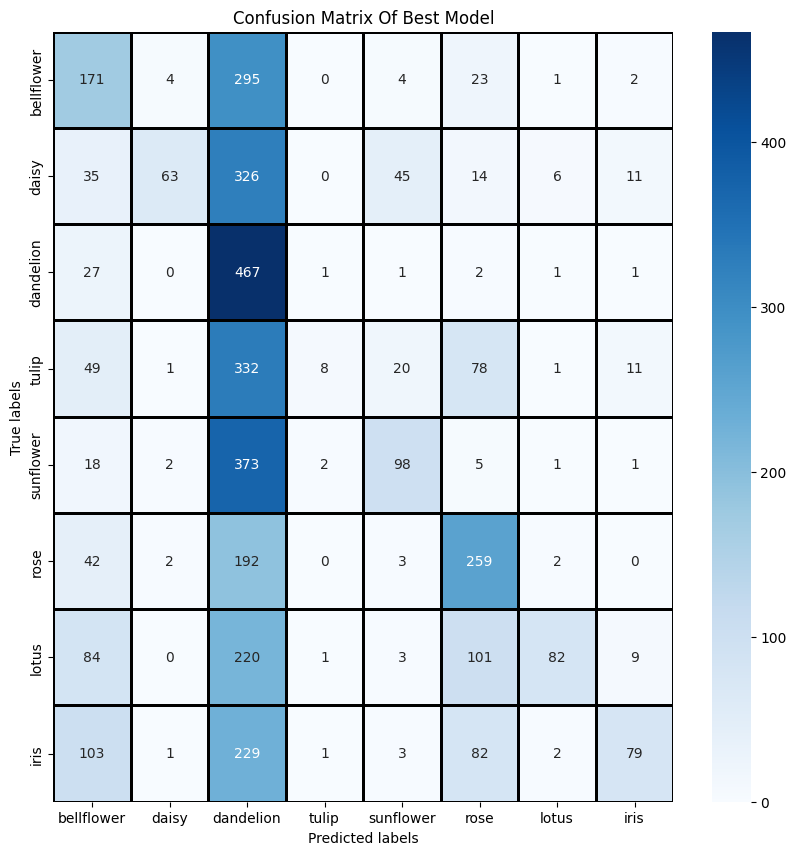

,precision,recall,f1-score,support
bellflower,0.323251,0.34200,0.332362,500.00000
daisy,0.863014,0.12600,0.219895,500.00000
dandelion,0.191865,0.93400,0.318337,500.00000
tulip,0.615385,0.01600,0.031189,500.00000
sunflower,0.553672,0.19600,0.289513,500.00000
rose,0.459220,0.51800,0.486842,500.00000
lotus,0.854167,0.16400,0.275168,500.00000
iris,0.692982,0.15800,0.257329,500.00000
accuracy,0.306750,0.30675,0.306750,0.30675
macro avg,0.569195,0.30675,0.276329,4000.00000


In [14]:
y_pred_ridge_nocolor=best_model.predict(x_test_nocolor)
confusion_plot = ConfusionMatrixPlot(labels, y_test, y_pred_ridge_nocolor)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_test_nocolor, y_pred_ridge_nocolor)
report_plot.plot()

In [15]:
y_knn=y_pred_knn.tolist()
y_xgb=y_pred_xgb.tolist()
y_svm=y_pred_svm.tolist()
y_ridge=y_pred_ridge.tolist()
y_test1=y_test.tolist()

NameError: name 'y_pred_xgb' is not defined

In [ ]:
y_knn_nocolor=y_pred_knn_nocolor.tolist()
y_xgb_nocolor=y_pred_xgb_nocolor.tolist()
y_svm_nocolor=y_pred_svm_nocolor.tolist()
y_ridge_nocolor=y_pred_ridge_nocolor.tolist()


In [ ]:
i=0
j=500
y_actually=list()
y_predict=list()
for f in range(8):
    y_predict+=y_knn[i:j]
    y_predict+=y_xgb[i:j]
    y_predict+=y_svm[i:j]
    y_predict+=y_ridge[i:j]
    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    i+=500
    j+=500
y_predict=np.array(y_predict)
y_actually=np.array(y_actually)


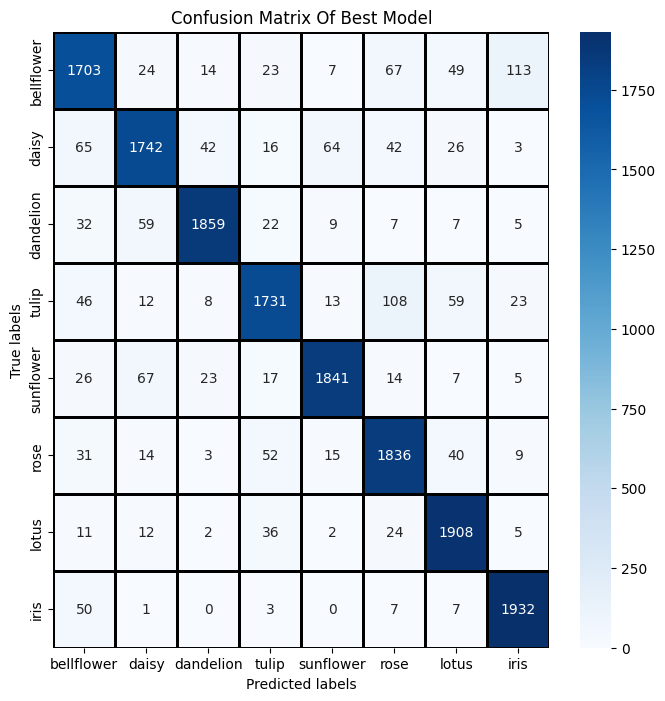

,precision,recall,f1-score,support
bellflower,0.867108,0.8515,0.859233,2000.0000
daisy,0.902123,0.8710,0.886288,2000.0000
dandelion,0.952845,0.9295,0.941028,2000.0000
tulip,0.911053,0.8655,0.887692,2000.0000
sunflower,0.943619,0.9205,0.931916,2000.0000
rose,0.872209,0.9180,0.894519,2000.0000
lotus,0.907275,0.9540,0.930051,2000.0000
iris,0.922196,0.9660,0.943590,2000.0000
accuracy,0.909500,0.9095,0.909500,0.9095
macro avg,0.909803,0.9095,0.909290,16000.0000


In [ ]:
confusion_plot = ConfusionMatrixPlot(labels, y_actually, y_predict)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_actually, y_predict)
report_plot.plot()

In [ ]:
i=0
j=500
y_actually=list()
y_predict=list()
for f in range(8):
    y_predict+=y_knn_nocolor[i:j]
    y_predict+=y_xgb_nocolor[i:j]
    y_predict+=y_svm_nocolor[i:j]
    y_predict+=y_ridge_nocolor[i:j]

    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    y_actually+=y_test1[i:j]
    i+=500
    j+=500
y_predict=np.array(y_predict)
y_actually=np.array(y_actually)


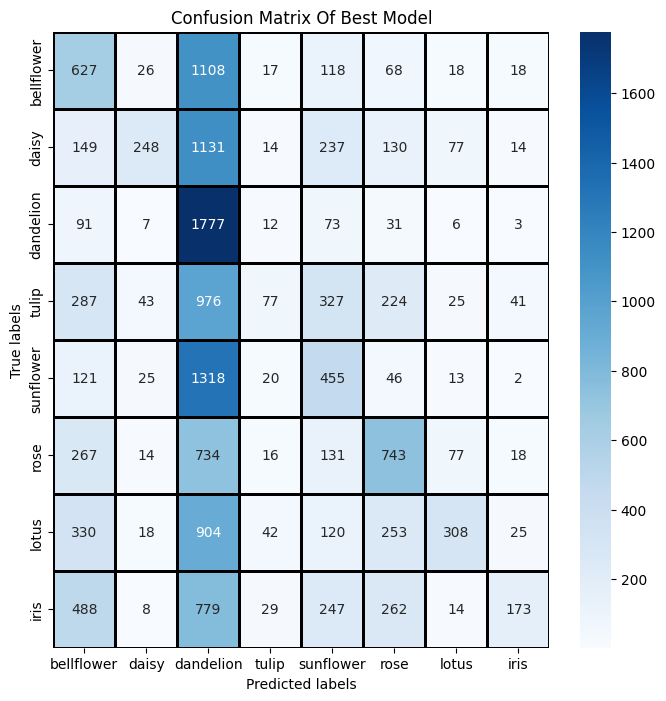

,precision,recall,f1-score,support
bellflower,0.265678,0.3135,0.287615,2000.0000
daisy,0.637532,0.1240,0.207618,2000.0000
dandelion,0.203621,0.8885,0.331314,2000.0000
tulip,0.339207,0.0385,0.069151,2000.0000
sunflower,0.266393,0.2275,0.245415,2000.0000
rose,0.422880,0.3715,0.395528,2000.0000
lotus,0.572491,0.1540,0.242711,2000.0000
iris,0.588435,0.0865,0.150828,2000.0000
accuracy,0.275500,0.2755,0.275500,0.2755
macro avg,0.412030,0.2755,0.241273,16000.0000


In [ ]:
confusion_plot = ConfusionMatrixPlot(labels, y_actually, y_predict)
confusion_plot.plot()
report_plot = ClassificationReportPlot(labels, y_actually, y_predict)
report_plot.plot()

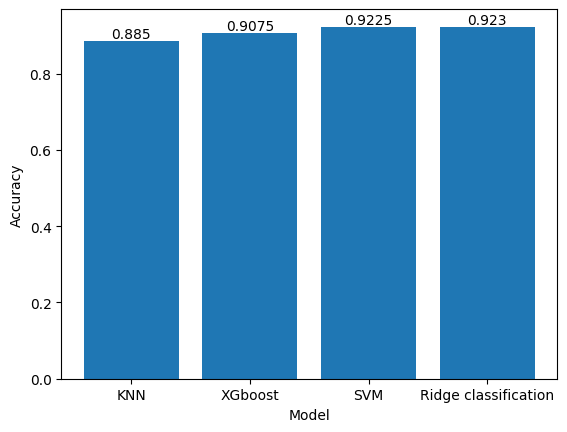

In [24]:
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)

categories = ['KNN', 'XGboost', 'SVM', 'Ridge classification']

values = [accuracy_knn, accuracy_xgb, accuracy_svm, accuracy_ridge]

# Tạo biểu đồ cột
plt.bar(categories, values)
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')
# Đặt tiêu đề và nhãn trục
# plt.title('Biểu đồ cột')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Hiển thị biểu đồ
plt.show()